## Gradient Descent
梯度下降算法

In [7]:
!python --version

Python 3.9.6


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from common import gradient_function,draw_regression,compute_cost

### Cost Function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


### Gradient Descent

$$
\begin{align*}
w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}
\newline
b &= b -  \alpha \frac{\partial J(w,b)}{\partial b} \tag{4}
\end{align*}
$$

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
\newline
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align}
$$


In [9]:
def gradient_descent(x_train, y_train, w_init, y_init, learning_rate, num_iterations):
        
    w = copy.deepcopy(w_init)
    b = copy.deepcopy(y_init)

    cost_history = []
    prediction_history = []

    for i in range(num_iterations):
        
        dj_w,dj_b = gradient_function(w,b,x_train,y_train)
        
        w = w - learning_rate * dj_w
        b = b - learning_rate * dj_b

        if i<100000:      # prevent resource exhaustion
            cost_history.append(compute_cost(w,b,x_train,y_train))
            prediction_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",f"dj_w: {dj_w: 0.3e}, dj_b: {dj_b: 0.3e}  ",f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w,b

In [10]:
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
w_init = 0
b_init = 0
num_iterations = 10000
tmp_alpha = 1.0e-2

w,b = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, num_iterations)

print(w,b)

Iteration    0: Cost 7.93e+04  dj_w: -6.500e+02, dj_b: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_w: -3.712e-01, dj_b:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_w: -1.789e-01, dj_b:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_w: -8.625e-02, dj_b:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_w: -4.158e-02, dj_b:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_w: -2.004e-02, dj_b:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_w: -9.660e-03, dj_b:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_w: -4.657e-03, dj_b:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_w: -2.245e-03, dj_b:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_w: -1.082e-03, dj_b:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
199.99285075131766 1

In [11]:

print(f"1000 sqft house prediction {w*1.0 + b:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w*1.2 + b:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w*2.0 + b:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


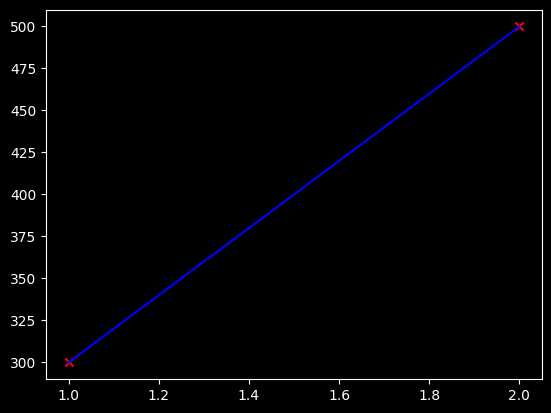

In [12]:
draw_regression(w,b,x_train,y_train)